In [2]:
import pandas as pd 
import numpy as np
import re

In [3]:
%cd C:\Users\Sunshine\Downloads\Compressed\Knight ML Assignment\

C:\Users\Sunshine\Downloads\Compressed\Knight ML Assignment


In [4]:
data = pd.read_csv(r'Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

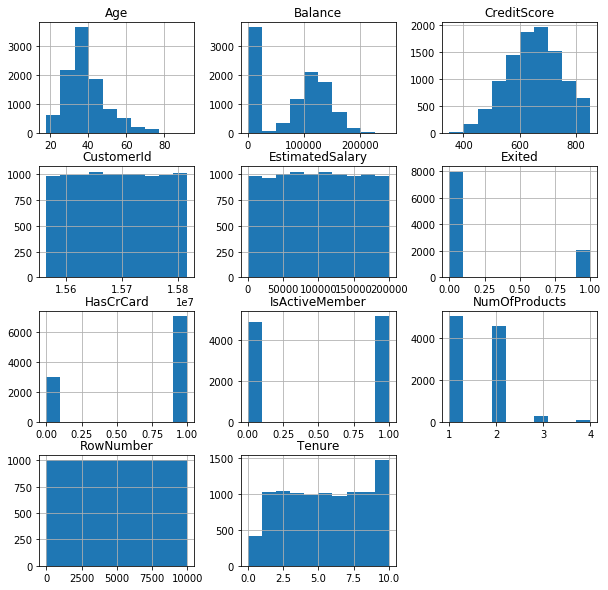

In [9]:
data.hist(figsize = (10, 10))
plt.show()

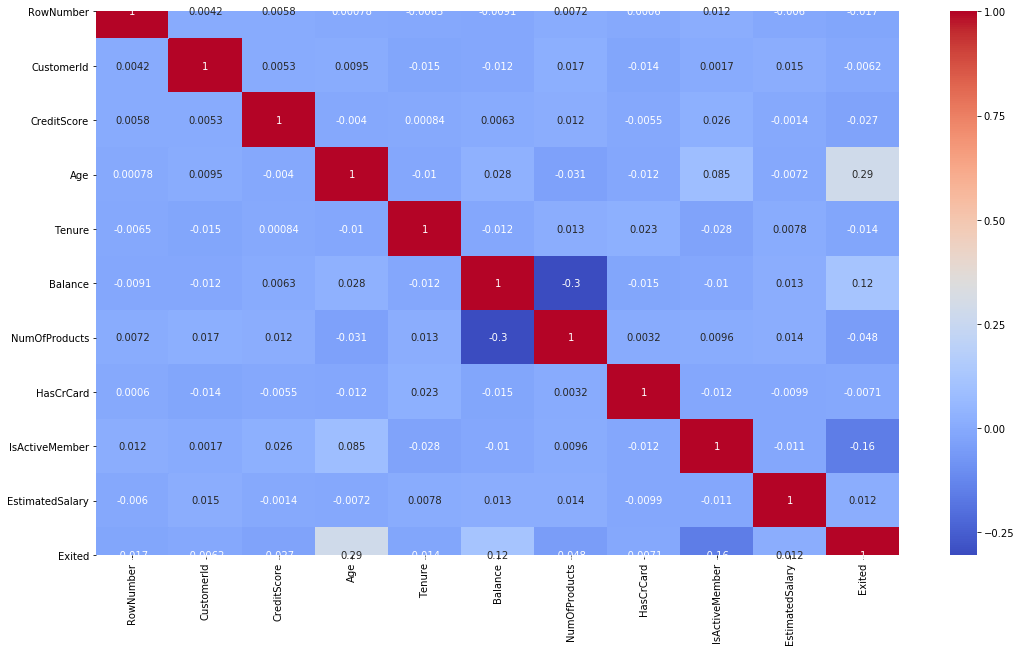

In [10]:
plt.figure(figsize = (18, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
data.shape

(10000, 14)

In [12]:
len(data)

10000

In [13]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()
data["Geography"] = label.fit_transform(data["Geography"])
data["Gender"] = label.fit_transform(data["Gender"])

In [16]:
data["Geography"].unique()

array([0, 2, 1], dtype=int64)

In [17]:
data["Gender"].unique()

array([0, 1], dtype=int64)

In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null int32
Gender             10000 non-null int32
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 1015.8+ KB


In [20]:
data.shape

(10000, 14)

In [21]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

In [22]:
X.shape

(10000, 10)

In [23]:
y.shape

(10000,)

# Using Random Search

In [24]:
params={
 "learning_rate"    : [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 20],
 "min_child_weight" : [ 1, 3, 5, 7, 9 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.6],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.10 ],
 "subsample"        : [ 0.5, 0.6, 0.7, 0.8, 0.9],
 "nthread"          : [ 3, 4, 5, 6, 7],
 "scale_pos_weight" : [ 0.8, 0.9, 1, 1.1]
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [26]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [27]:
clf=xgboost.XGBClassifier()

In [28]:
random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [29]:
from datetime import datetime
start_time = timer(None) 
random_search.fit(X,y)
timer(start_time) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.7s finished



 Time taken: 0 hours 0 minutes and 14.49 seconds.


In [30]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=7, nthread=7, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.8, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
random_search.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 0.8,
 'nthread': 7,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [37]:
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=7, nthread=7, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.8, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,y,cv=10)

In [39]:
score

array([0.86613387, 0.85514486, 0.86913087, 0.865     , 0.863     ,
       0.847     , 0.865     , 0.88288288, 0.86186186, 0.85785786])

In [40]:
score.mean()

0.8633012193012194

In [41]:
clf.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=7, nthread=7, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.8, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
pred = clf.predict(X)

In [43]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
import pickle

In [45]:
pickle.dump(clf, open('clf.pkl', 'wb'))

In [44]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y, pred, average='micro')

0.8701999999999999